# Breast Cancer Prediction

## Binary Classification Prediction for type of Breast Cancer

In [292]:
options(warn = -1)

#### Libraries

In [ ]:
library(dplyr)
library(tidyr)
library(corrplot)
library(DataExplorer)
library(Amelia)
library(GGally)
library(caret)
# models
library(nnet)
library(kernlab)
library(klaR)
library(mda)
library(earth)
library(randomForest)
library(C50)
library(gbm)
library(pls)
library(glmnet)
library(pamr)
library(pROC)

## Exploration Data Analysis

#### Importing the dataset

In [294]:
breast_df <- read.csv('breast-cancer.csv')

Dropping the first column 'id'

In [295]:
breast_df$id <- NULL

#### Checking dimensions

In [296]:
dim <- dim(breast_df)
cat('Num Rows: ', dim[1], 'Num Col: ', dim[2])

Num Rows:  569 Num Col:  31

#### Showing first rows

In [297]:
head(breast_df)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,⋯,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
2,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,⋯,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
3,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,⋯,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,⋯,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
5,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,⋯,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
6,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,⋯,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


#### Showing Data types

In [298]:
str(breast_df)

'data.frame':	569 obs. of  31 variables:
 $ diagnosis              : chr  "M" "M" "M" "M" ...
 $ radius_mean            : num  18 20.6 19.7 11.4 20.3 ...
 $ texture_mean           : num  10.4 17.8 21.2 20.4 14.3 ...
 $ perimeter_mean         : num  122.8 132.9 130 77.6 135.1 ...
 $ area_mean              : num  1001 1326 1203 386 1297 ...
 $ smoothness_mean        : num  0.1184 0.0847 0.1096 0.1425 0.1003 ...
 $ compactness_mean       : num  0.2776 0.0786 0.1599 0.2839 0.1328 ...
 $ concavity_mean         : num  0.3001 0.0869 0.1974 0.2414 0.198 ...
 $ concave.points_mean    : num  0.1471 0.0702 0.1279 0.1052 0.1043 ...
 $ symmetry_mean          : num  0.242 0.181 0.207 0.26 0.181 ...
 $ fractal_dimension_mean : num  0.0787 0.0567 0.06 0.0974 0.0588 ...
 $ radius_se              : num  1.095 0.543 0.746 0.496 0.757 ...
 $ texture_se             : num  0.905 0.734 0.787 1.156 0.781 ...
 $ perimeter_se           : num  8.59 3.4 4.58 3.44 5.44 ...
 $ area_se                : num  153.4 74

#### Summary Statistics

In [299]:
summary(breast_df)

  diagnosis          radius_mean      texture_mean   perimeter_mean  
 Length:569         Min.   : 6.981   Min.   : 9.71   Min.   : 43.79  
 Class :character   1st Qu.:11.700   1st Qu.:16.17   1st Qu.: 75.17  
 Mode  :character   Median :13.370   Median :18.84   Median : 86.24  
                    Mean   :14.127   Mean   :19.29   Mean   : 91.97  
                    3rd Qu.:15.780   3rd Qu.:21.80   3rd Qu.:104.10  
                    Max.   :28.110   Max.   :39.28   Max.   :188.50  
   area_mean      smoothness_mean   compactness_mean  concavity_mean   
 Min.   : 143.5   Min.   :0.05263   Min.   :0.01938   Min.   :0.00000  
 1st Qu.: 420.3   1st Qu.:0.08637   1st Qu.:0.06492   1st Qu.:0.02956  
 Median : 551.1   Median :0.09587   Median :0.09263   Median :0.06154  
 Mean   : 654.9   Mean   :0.09636   Mean   :0.10434   Mean   :0.08880  
 3rd Qu.: 782.7   3rd Qu.:0.10530   3rd Qu.:0.13040   3rd Qu.:0.13070  
 Max.   :2501.0   Max.   :0.16340   Max.   :0.34540   Max.   :0.42680  
 conca

#### Looking for Missing data

In [300]:
colSums(is.na(breast_df))

diagnosis             radius_mean            texture_mean 
                      0                       0                       0 
         perimeter_mean               area_mean         smoothness_mean 
                      0                       0                       0 
       compactness_mean          concavity_mean     concave.points_mean 
                      0                       0                       0 
          symmetry_mean  fractal_dimension_mean               radius_se 
                      0                       0                       0 
             texture_se            perimeter_se                 area_se 
                      0                       0                       0 
          smoothness_se          compactness_se            concavity_se 
                      0                       0                       0 
      concave.points_se             symmetry_se    fractal_dimension_se 
                      0                       0                       0 
           radius_worst           texture_worst         perimeter_worst 
                      0                       0                       0 
             area_worst        smoothness_worst       compactness_worst 
                      0                       0                       0 
        concavity_worst    concave.points_worst          symmetry_worst 
                      0                       0                       0 
fractal_dimension_worst 
                      0

This dataset doens't show any missing values in any column

#### Checking for Duplicates

In [301]:
breast_df[duplicated(breast_df), ]

diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave.points_mean,symmetry_mean,⋯,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave.points_worst,symmetry_worst,fractal_dimension_worst
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


#### Changing 'diagnosis' column to category data type

In [302]:
breast_df$diagnosis <- as.factor(breast_df$diagnosis)

#### Checking how many categories of each type exists in the dataset

In [303]:
breast_table <- table(breast_df$diagnosis)
breast_table


  B   M 
357 212 

#### Calculating percentatge of class imbalance

In [304]:
total_class_imbalance <- breast_table[1] + breast_table[2]

breast_class_B <- breast_table[1] / total_class_imbalance
breast_class_M <- breast_table[2] / total_class_imbalance

cat("Quantity of Class B:", breast_class_B * 100, "%", "Quantity of Class M:", breast_class_M * 100, "%")


Quantity of Class B: 62.74165 % Quantity of Class M: 37.25835 %

The calculations show a clear class imbalance between class B and class M

#### Visualization for Categorical Column

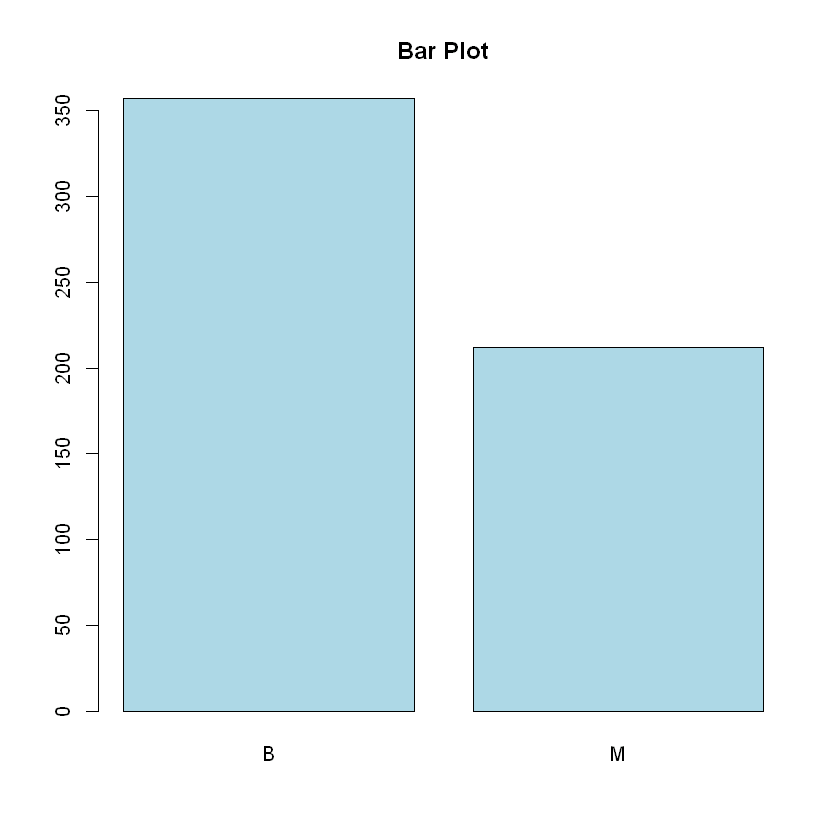

In [305]:
barplot(table(breast_df$diagnosis), main = "Bar Plot", col = 'lightblue')

#### Visualizations for Numerical columns

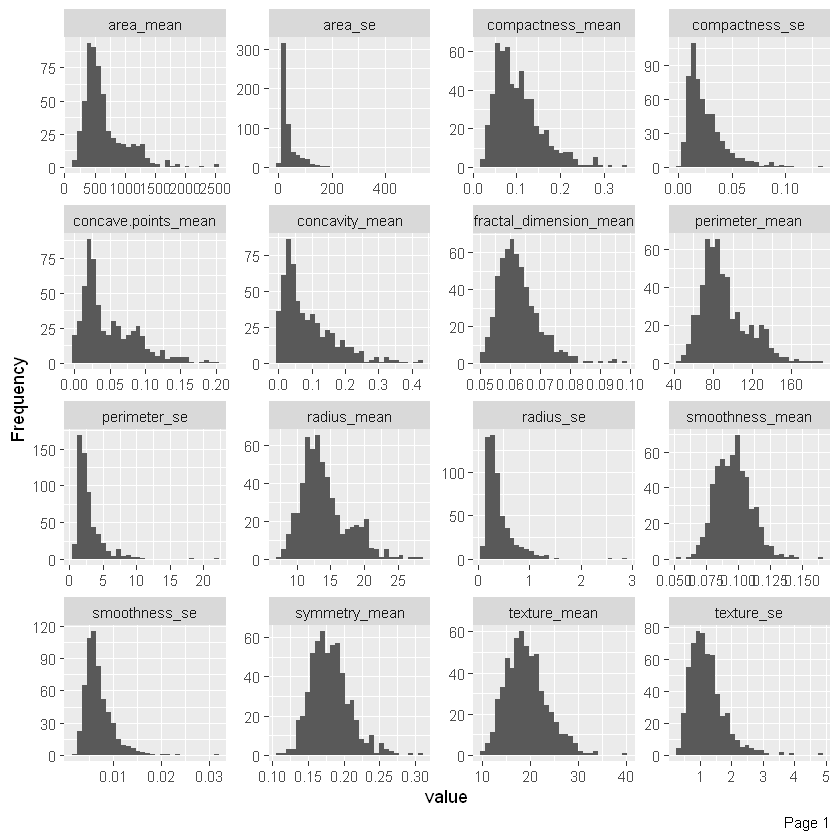

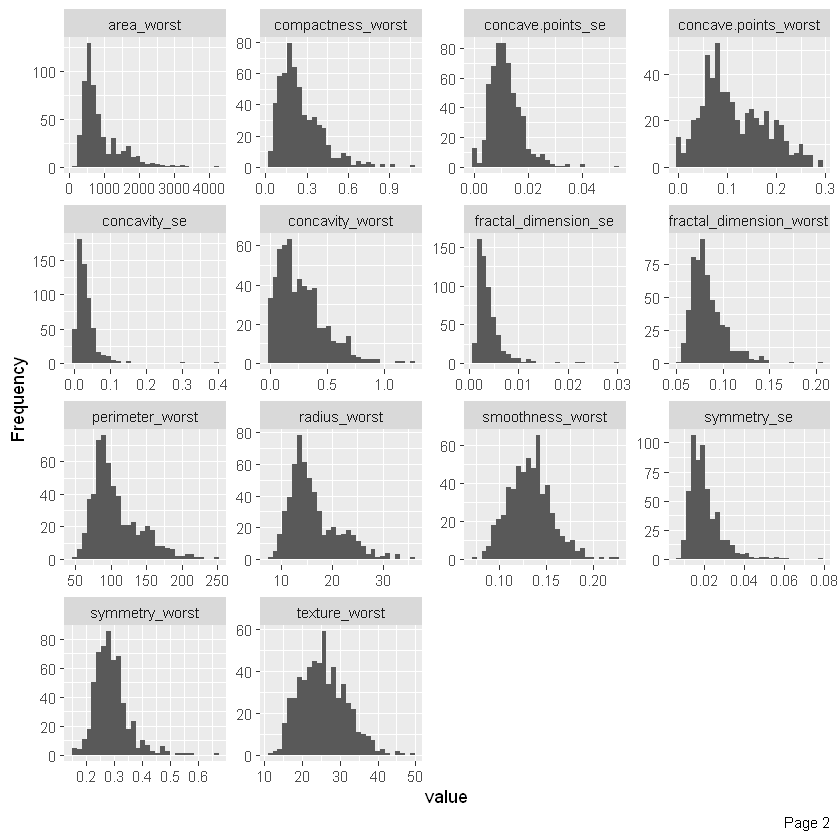

In [306]:
plot_histogram(breast_df)

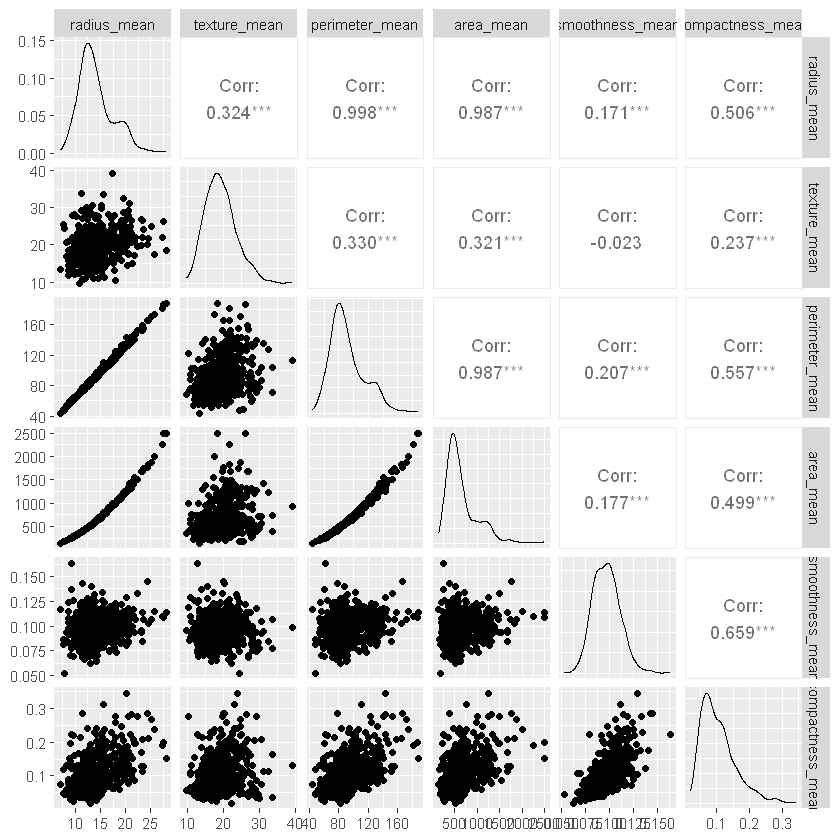

In [307]:
# Only select numeric columns
numeric_data <- breast_df[sapply(breast_df, is.numeric)]

# Pairwise scatterplots and correlations
ggpairs(numeric_data[ , 1:6])  # Try fewer columns if it's too dense

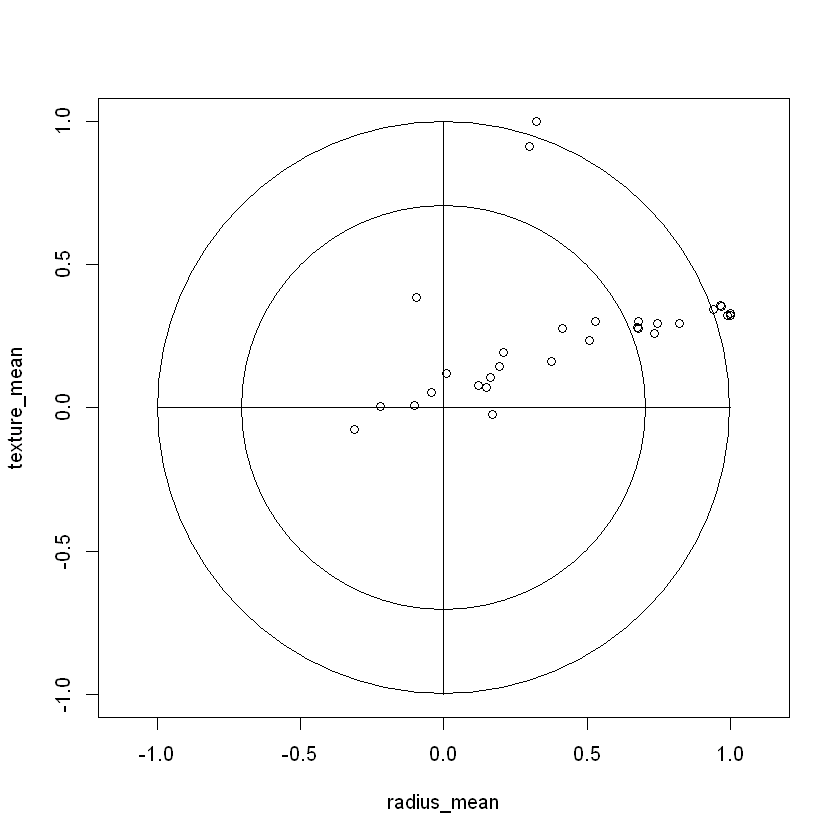

In [308]:
# Correlation matrix
num_data <- select_if(breast_df, is.numeric)
cor_matrix <- cor(num_data, use = "complete.obs")

corrplot(cor_matrix, method = "color")


#### Data Splitting

Using Stratified random sampling to maintain class proportions. Since this method works best for classification problems

In [309]:
# Setting up seed
set.seed(123)

# 60% into training 
trainIndex <- createDataPartition(breast_df$diagnosis, p = 0.6, list = FALSE)

# Splitting the data
breast_train <- breast_df[trainIndex, ]
breast_test  <- breast_df[-trainIndex, ]

# Checking if the split is equally split
prop.table(table(breast_train$diagnosis))
prop.table(table(breast_test$diagnosis))


        B         M 
0.6268222 0.3731778 


        B         M 
0.6283186 0.3716814 

Yes, the split is even

#### Data Preprocessing (on training set)

Since we have many skewed data points, we will use boxcox method

In [310]:
# Fit preprocessing on training data (excluding the target variable "diagnosis")
preproc <- preProcess(breast_train[, -1], method = c("BoxCox","center", "scale"))

In [311]:
# Apply preprocessing to both train and test
train_processed <- predict(preproc, breast_train[, -1])
test_processed  <- predict(preproc, breast_test[, -1])

In [312]:
# Add back the target variable
train_processed$diagnosis <- breast_train$diagnosis
test_processed$diagnosis  <- breast_test$diagnosis

#### Computing correlation matrix before modeling

In [313]:
cor_matrix <- cor(train_processed[, -which(names(train_processed) == "diagnosis")]) # excluding the target variable and computes the correlation matrix for all predictor variables

#### Finding predictors with correlations above 0.75

In [314]:
highCorr <- findCorrelation(cor_matrix, cutoff = 0.75) # highCorr is a vector of column indices to remove.

In [315]:
train_filtered <- train_processed[, -highCorr] # Removes the identified highly correlated columns

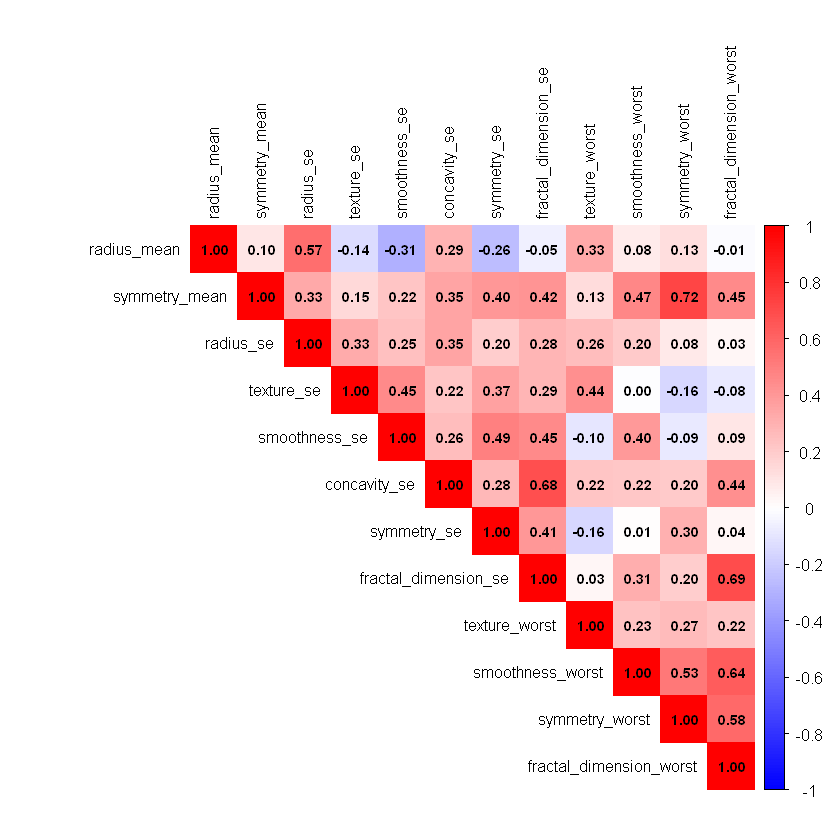

In [316]:
filtered_predictors <- train_filtered[, !(names(train_filtered) %in% "diagnosis")]
cor_matrix_filtered <- cor(filtered_predictors)

# Plot the filtered correlation matrix
corrplot::corrplot(cor_matrix_filtered, method = "color", type = "upper",
         tl.cex = 0.8, tl.col = "black",
         col = colorRampPalette(c("blue", "white", "red"))(200),
         addCoef.col = "black", number.cex = 0.7)

We have reduced the number of predictors to 12 that are not highly correlated with one another

#### Checking the number of outliers

In [317]:
# Remove target variable
predictors <- train_filtered[, !(names(train_filtered) %in% "diagnosis")]

In [318]:
# Function to compute outlier counts
outlier_count <- function(x) {
  qnt <- quantile(x, probs=c(0.25, 0.75))
  iqr <- qnt[2] - qnt[1]
  lower <- qnt[1] - 1.5 * iqr
  upper <- qnt[2] + 1.5 * iqr
  sum(x < lower | x > upper)
}

# Apply to all predictors
sapply(predictors, outlier_count)

radius_mean           symmetry_mean               radius_se 
                      7                       6                       2 
             texture_se           smoothness_se            concavity_se 
                      2                       3                      17 
            symmetry_se    fractal_dimension_se           texture_worst 
                      1                       1                       0 
       smoothness_worst          symmetry_worst fractal_dimension_worst 
                      2                       8                       1

## Modelation

#### Defining Cross-validation

In [319]:
ctrl <- trainControl(method = "cv", number = 10)

#### Neural Network

In [320]:
nn_model <- train(diagnosis ~ ., data = train_filtered,
                  method = "nnet",
                  trControl = ctrl,
                  preProcess = NULL,
                  trace = FALSE,  # suppress training output
                  linout = FALSE)

#### Support Vector Machine (SVM)

In [321]:
svm_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "svmRadial",
                   trControl = ctrl,
                   preProcess = NULL)

#### k-Nearest Neighbors

In [322]:
knn_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "knn",
                   trControl = ctrl,
                   preProcess = NULL)

#### Naïve Bayes

In [323]:
nb_model <- train(diagnosis ~ ., data = train_filtered,
                  method = "nb",
                  trControl = ctrl,
                  preProcess = NULL)

#### Flexible Discriminant Analysis (FDA)

In [324]:
fda_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "fda",
                   trControl = ctrl,
                   preProcess = NULL)

#### Putting all the models together

In [325]:
models_list <- list(
  NeuralNet = nn_model,
  SVM = svm_model,
  KNN = knn_model,
  NaiveBayes = nb_model,
  FDA = fda_model
)

#### Compraing Results


Call:
summary.resamples(object = results)

Models: NeuralNet, SVM, KNN, NaiveBayes, FDA 
Number of resamples: 10 

Accuracy 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NeuralNet  0.9705882 0.9705882 0.9710084 0.9795798 0.9928571 1.0000000    0
SVM        0.8823529 0.9210084 0.9705882 0.9563866 0.9926471 1.0000000    0
KNN        0.8823529 0.9142857 0.9420168 0.9450369 0.9924242 1.0000000    0
NaiveBayes 0.8285714 0.9142857 0.9411765 0.9275579 0.9424370 0.9705882    0
FDA        0.8823529 0.9123950 0.9567227 0.9446218 0.9705882 1.0000000    0

Kappa 
                Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
NeuralNet  0.9343629 0.9370605 0.9382306 0.9560891 0.9846570 1.0000000    0
SVM        0.7433962 0.8266598 0.9368030 0.9046945 0.9842007 1.0000000    0
KNN        0.7354086 0.8088794 0.8726722 0.8790170 0.9833333 1.0000000    0
NaiveBayes 0.6440678 0.8111815 0.8735780 0.8443248 0.8770813 0.9343629    0
FDA        0.7354086 0.8139837

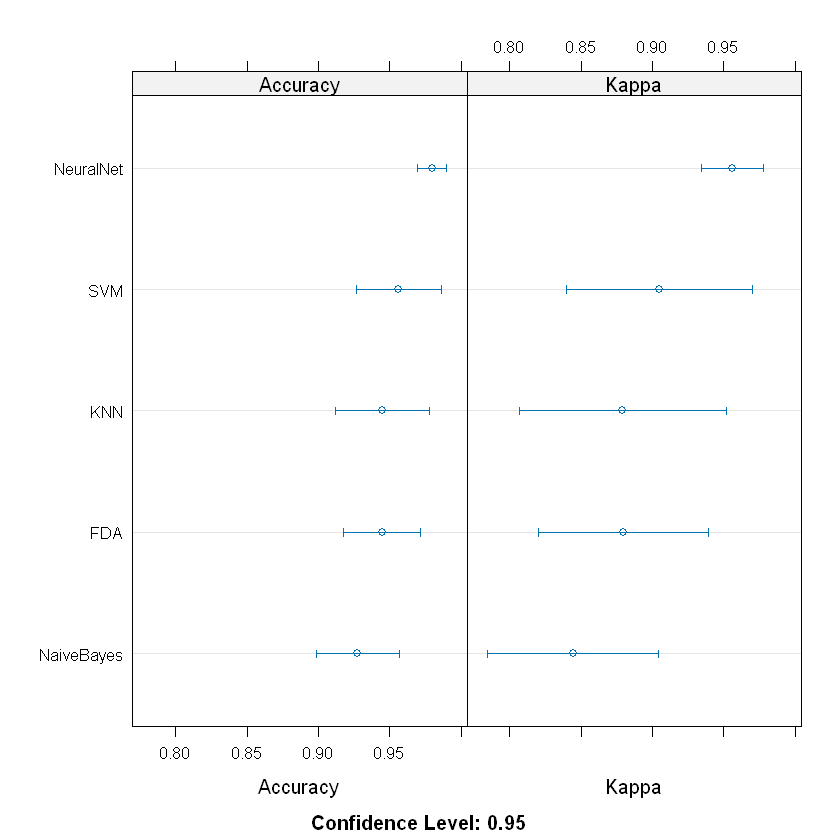

In [326]:
# Collect resampling results
results <- resamples(models_list)

# Summary table
summary(results)
dotplot(results)


Among the models tested, the neural network achieved the highest cross-validated mean accuracy (97.96%) and Kappa (95.69%), followed closely by SVM (95.64% accuracy, 94.06% Kappa), while KNN, FDA, and Naive Bayes showed slightly lower performance with greater variability.

#### Classification tree (CART)

In [327]:
cart_model <- train(diagnosis ~ ., data = train_filtered,
                    method = "rpart",
                    trControl = ctrl)

#### Bagged trees

In [328]:
bagged_model <- train(diagnosis ~ ., data = train_filtered,
                      method = "treebag",
                      trControl = ctrl)

#### Random forest

In [329]:
rf_model <- train(diagnosis ~ ., data = train_filtered,
                  method = "rf",
                  trControl = ctrl)

#### Boosted trees (GBM)

In [330]:
boosted_model <- train(diagnosis ~ ., data = train_filtered,
                       method = "gbm",
                       trControl = ctrl,
                       verbose = FALSE)

#### C5.0

In [331]:
c50_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "C5.0",
                   trControl = ctrl)

#### Comparing performance for Tree-based and Ensemble Models


Call:
summary.resamples(object = results_tree)

Models: CART, Bagged, RF, GBM, C50 
Number of resamples: 10 

Accuracy 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
CART   0.8529412 0.8602941 0.8823529 0.8889076 0.9052521 0.9428571    0
Bagged 0.8285714 0.8922269 0.9130252 0.9129361 0.9411765 0.9696970    0
RF     0.8823529 0.9415966 0.9567227 0.9535294 0.9705882 1.0000000    0
GBM    0.8235294 0.9415966 0.9696970 0.9446957 0.9714286 1.0000000    0
C50    0.8823529 0.9205628 0.9420168 0.9415865 0.9705882 0.9714286    0

Kappa 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
CART   0.6931408 0.7171407 0.7613565 0.7703383 0.8002409 0.8776224    0
Bagged 0.6328671 0.7746361 0.8146918 0.8140209 0.8750050 0.9333333    0
RF     0.7424242 0.8721851 0.9052246 0.8987148 0.9381719 1.0000000    0
GBM    0.6031128 0.8731792 0.9333333 0.8791696 0.9392775 1.0000000    0
C50    0.7433962 0.8305072 0.8767674 0.8741912 0.9375755 0.9386282    0


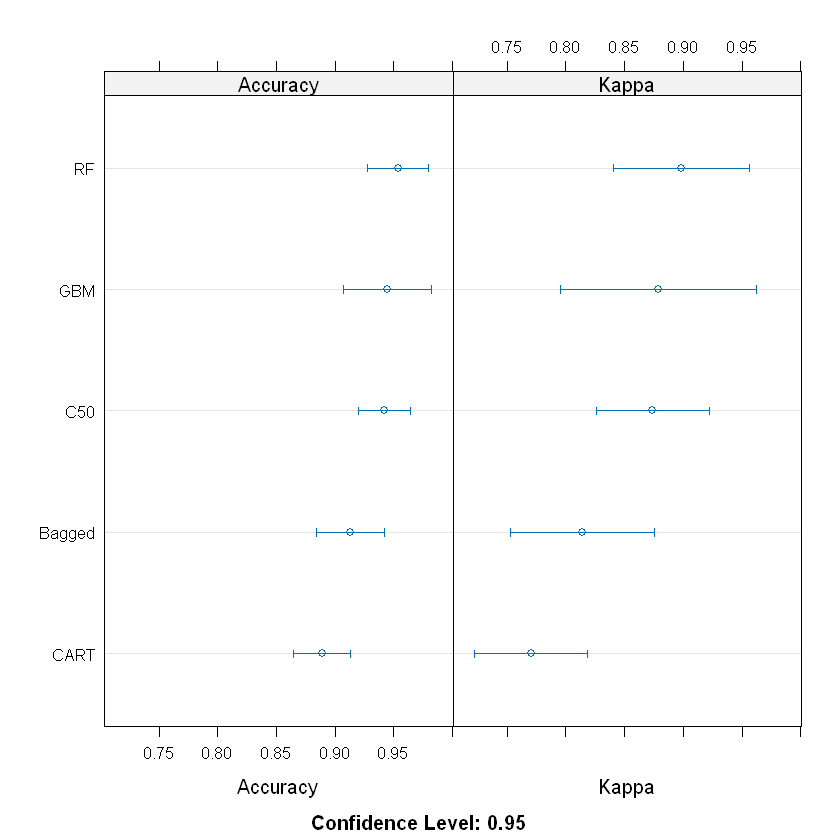

In [332]:
models_list_tree <- list(CART = cart_model, Bagged = bagged_model, RF = rf_model,
                         GBM = boosted_model, C50 = c50_model)

results_tree <- resamples(models_list_tree)
summary(results_tree)
dotplot(results_tree)


#### Linear and Regularized Models

#### Logistic regression

In [333]:
log_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "glm",
                   family = "binomial",
                   trControl = ctrl)

#### Linear Discriminant Analysis (LDA)

In [334]:
lda_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "lda",
                   trControl = ctrl)

#### Quadratic Discriminant Analysis (QDA)

In [335]:
qda_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "qda",
                   trControl = ctrl)

#### Partial Least Squares Discriminant Analysis (PLS-DA)

In [336]:
plsda_model <- train(diagnosis ~ ., data = train_filtered,
                     method = "pls",
                     trControl = ctrl)

#### Penalized models

##### Ridge regression

In [337]:
ridge_model <- train(diagnosis ~ ., data = train_filtered,
                     method = "glmnet",
                     trControl = ctrl,
                     tuneGrid = expand.grid(alpha = 0, lambda = seq(0.0001, 1, length = 10)))

##### Lasso regression

In [338]:
lasso_model <- train(diagnosis ~ ., data = train_filtered,
                     method = "glmnet",
                     trControl = ctrl,
                     tuneGrid = expand.grid(alpha = 1, lambda = seq(0.0001, 1, length = 10)))

##### Elastic net

In [339]:
elastic_model <- train(diagnosis ~ ., data = train_filtered,
                       method = "glmnet",
                       trControl = ctrl,
                       tuneLength = 10)  # automatically searches alpha & lambda

##### Nearest Shrunken Centroids

In [340]:
nsc_model <- train(diagnosis ~ ., data = train_filtered,
                   method = "pam",
                   trControl = ctrl)

12345678910111213141516171819202122232425262728293011111111111

#### Comparing linear models


Call:
summary.resamples(object = results_linear)

Models: Logistic, LDA, QDA, PLSDA, Ridge, Lasso, ElasticNet, NSC 
Number of resamples: 10 

Accuracy 
                Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
Logistic   0.9142857 0.9415966 0.9562771 0.9594067 0.9712185    1    0
LDA        0.9117647 0.9415966 0.9701426 0.9620117 0.9714286    1    0
QDA        0.8857143 0.9210084 0.9558824 0.9509244 0.9926471    1    0
PLSDA      0.9411765 0.9415966 0.9705882 0.9621008 0.9712185    1    0
Ridge      0.9411765 0.9415966 0.9710084 0.9679832 0.9928571    1    0
Lasso      0.9411765 0.9415966 0.9701426 0.9678100 0.9928571    1    0
ElasticNet 0.9696970 0.9705882 0.9710084 0.9765444 0.9714286    1    0
NSC        0.8235294 0.8922269 0.9142857 0.9127731 0.9424370    1    0

Kappa 
                Min.   1st Qu.    Median      Mean   3rd Qu. Max. NA's
Logistic   0.8247078 0.8740991 0.9054779 0.9127371 0.9384294    1    0
LDA        0.8045977 0.8740991 0.9350177 0.9171101 0.93783

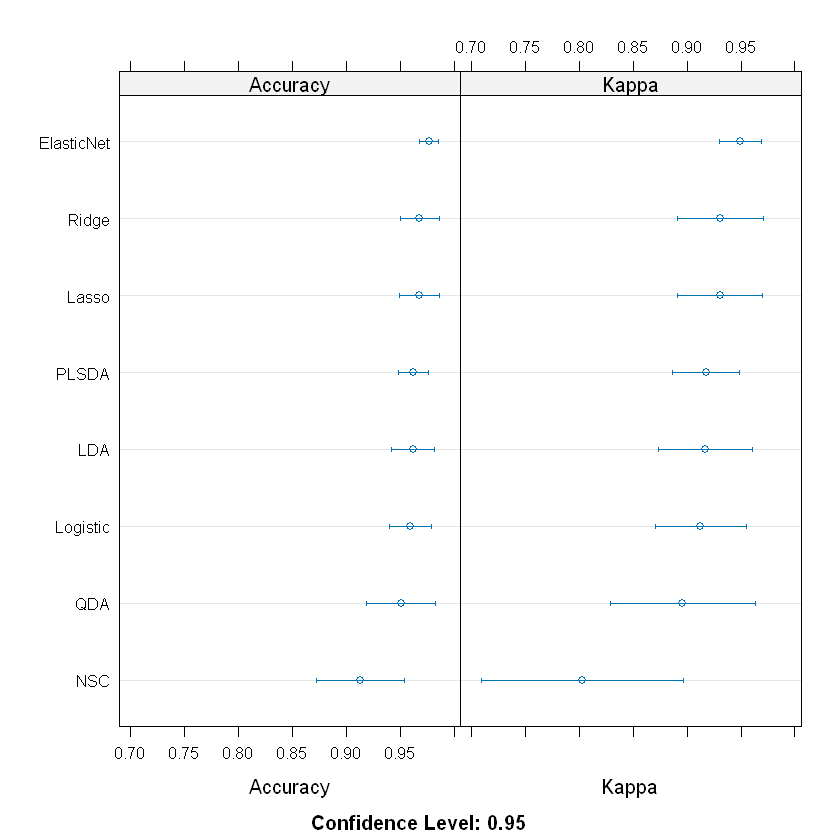

In [341]:
models_list_linear <- list(Logistic = log_model, LDA = lda_model, QDA = qda_model, 
                           PLSDA = plsda_model, Ridge = ridge_model, Lasso = lasso_model,
                           ElasticNet = elastic_model, NSC = nsc_model)

results_linear <- resamples(models_list_linear)
summary(results_linear)
dotplot(results_linear)

## Summarizing all the models

In [342]:
# Example data (replace with your actual numbers)
results_summary <- data.frame(
  Group = c("Linear & Regularized", "Tree & Ensemble", "Other classifiers"),
  Model = c("Elastic Net", "Random Forest", "Neural Net"),
  MeanAccuracy = c(0.9765, 0.9535, 0.9796),
  MeanKappa = c(0.9405, 0.8987, 0.9561)
)

print(results_summary)

                 Group         Model MeanAccuracy MeanKappa
1 Linear & Regularized   Elastic Net       0.9765    0.9405
2      Tree & Ensemble Random Forest       0.9535    0.8987
3    Other classifiers    Neural Net       0.9796    0.9561


Among all models, the neural network achieved the highest cross-validated mean accuracy (97.96%) and Kappa (95.61%), followed closely by elastic net (97.65% accuracy, 94.05% Kappa), while random forest led among tree-based models with 95.35% accuracy and 89.87% Kappa.

## Preparing test dataset

Removing correlated columns

In [343]:
test_filtered <- test_processed[, names(train_filtered)]

## Making predictions with the best performance models

In [344]:
# Neural network
pred_nn <- predict(nn_model, newdata = test_filtered)
cm_nn <- confusionMatrix(pred_nn, test_filtered$diagnosis)

In [345]:
# Elastic net
pred_en <- predict(elastic_model, newdata = test_filtered)
cm_en <- confusionMatrix(pred_en, test_filtered$diagnosis)

In [346]:
# Random forest
pred_rf <- predict(rf_model, newdata = test_filtered)
cm_rf <- confusionMatrix(pred_rf, test_filtered$diagnosis)

#### Comparison Table between models:

In [347]:
# Create a data frame with selected metrics
results_table <- data.frame(
  Model = c("Neural Network", "Elastic Net", "Random Forest"),
  Accuracy = c(cm_nn$overall["Accuracy"],
               cm_en$overall["Accuracy"],
               cm_rf$overall["Accuracy"]),
  Kappa = c(cm_nn$overall["Kappa"],
            cm_en$overall["Kappa"],
            cm_rf$overall["Kappa"]),
  Sensitivity = c(cm_nn$byClass["Sensitivity"],
                  cm_en$byClass["Sensitivity"],
                  cm_rf$byClass["Sensitivity"]),
  Specificity = c(cm_nn$byClass["Specificity"],
                  cm_en$byClass["Specificity"],
                  cm_rf$byClass["Specificity"])
)

# Print the table
print(results_table)


           Model  Accuracy     Kappa Sensitivity Specificity
1 Neural Network 0.9690265 0.9341656   0.9647887   0.9761905
2    Elastic Net 0.9557522 0.9052649   0.9647887   0.9404762
3  Random Forest 0.9380531 0.8680127   0.9436620   0.9285714


#### Generating ROC and AUC 

In [348]:
# Neural network
prob_nn <- predict(nn_model, newdata = test_filtered, type = "prob")
roc_nn <- roc(response = test_filtered$diagnosis, predictor = prob_nn[, "M"])

# Elastic Net
prob_en <- predict(elastic_model, newdata = test_filtered, type = "prob")
roc_en <- roc(response = test_filtered$diagnosis, predictor = prob_en[, "M"])

# Random Forest
prob_rf <- predict(rf_model, newdata = test_filtered, type = "prob")
roc_rf <- roc(response = test_filtered$diagnosis, predictor = prob_rf[, "M"])


Setting levels: control = B, case = M

Setting direction: controls < cases



Setting levels: control = B, case = M

Setting direction: controls < cases

Setting levels: control = B, case = M

Setting direction: controls < cases



## ROC curves

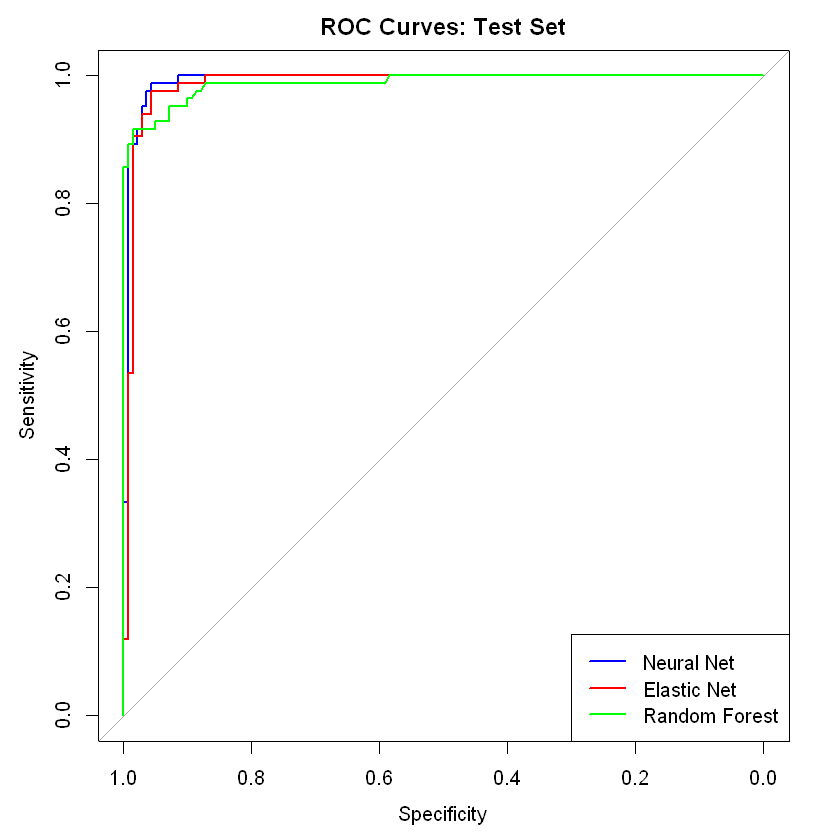

In [349]:
plot(roc_nn, col = "blue", main = "ROC Curves: Test Set")
plot(roc_en, col = "red", add = TRUE)
plot(roc_rf, col = "green", add = TRUE)
legend("bottomright", legend = c("Neural Net", "Elastic Net", "Random Forest"),
       col = c("blue", "red", "green"), lwd = 2)

AUC Values

In [350]:
cat("Neural Net AUC:", auc(roc_nn), "\n")
cat("Elastic Net AUC:", auc(roc_en), "\n")
cat("Random Forest AUC:", auc(roc_rf), "\n")

Neural Net AUC: 0.9922032 
Elastic Net AUC: 0.9868377 
Random Forest AUC: 0.9883048 


On the test set, all models demonstrated excellent classification performance, with the neural network achieving the highest AUC (0.992), followed by random forest (0.988) and elastic net (0.987), indicating very high ability to distinguish malignant from benign cases.

#### Lift chart for best model: neural net

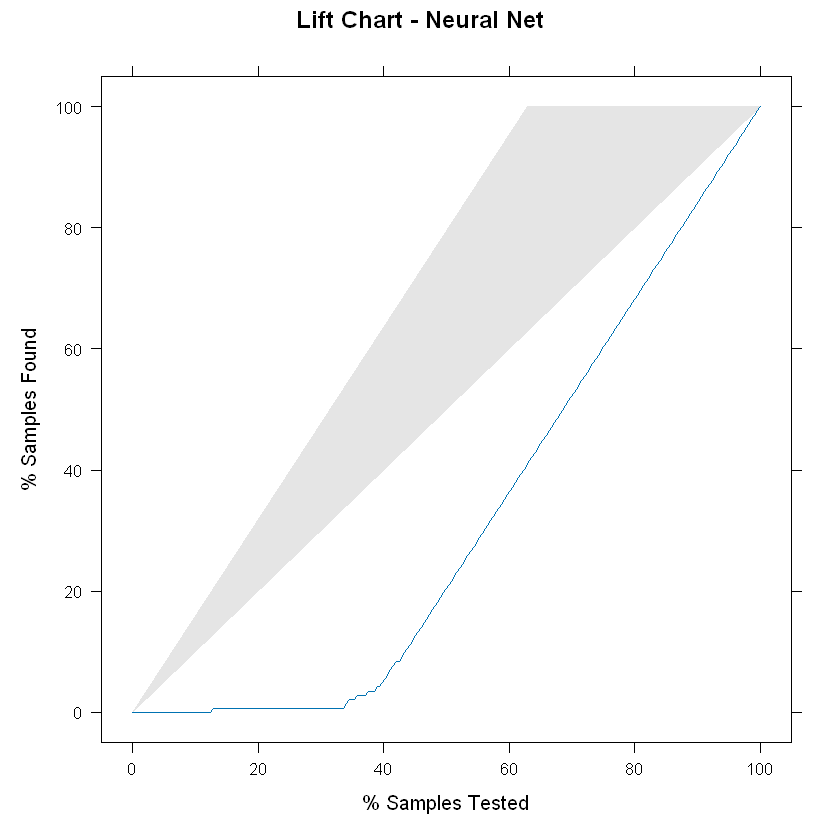

In [351]:
# Predict probabilities
prob_nn <- predict(nn_model, newdata = test_filtered, type = "prob")

# Generate lift object
lift_nn <- lift(diagnosis ~ prob_nn[, "M"], data = test_filtered)

# Plot lift chart
plot(lift_nn, main = "Lift Chart - Neural Net")


This lift chart shows us how well the model ranks positive cases (M).

## Conclusion

The classification models developed for breast cancer diagnosis showed excellent predictive performance on the test set. Among them, the neural network achieved the highest AUC (0.992) and strong accuracy, indicating superior ability to distinguish between malignant and benign cases. The elastic net (AUC 0.987) and random forest (AUC 0.988) models also performed exceptionally well, offering robust alternatives with comparable discrimination power. These results highlight that both linear regularized models and nonlinear ensemble methods can provide highly reliable predictions in this medical classification task. Future work could explore external validation on independent datasets and assess model interpretability for clinical use.